In [167]:
import os
import csv
from email.parser import BytesParser, Parser
from email.policy import default
import numpy as np
import pandas as pd
import sys

In [168]:
def send_email_features_to_csv(emails, csvFileName):
    with open(csvFileName, 'w', newline='') as fp:
        writer = csv.writer(fp)
        
        # header row
        writer.writerow(["To","Body"])
        
        # define max & count
        
        for filename in os.listdir(emails):
            try:
                if (filename.endswith('.txt')):
                    # read each file as binary 
                    with open(os.path.join(emails, filename), 'rb') as fp:

                        # define message object
                        msg = BytesParser(policy=default).parse(fp)
                        to_ = msg.get('to')

                        # parse features
                        
                        body_ = msg.get_body(preferencelist=('plain')).get_content()
                       

                        # Write the row to the csv file
                        writer.writerow([to_,body_])
            except:
                pass

In [169]:
#Get all of the files from the spam and ham directory
hamPath = "data/ham_text/"
spamPath = "data/spam_text/"

In [170]:
send_email_features_to_csv(hamPath, "allHamData.csv")
send_email_features_to_csv(spamPath, "allSpamData.csv")

## HAM DATA SET UP

In [171]:
emailHamData = pd.read_csv('allHamData.csv')

In [172]:
emailHamData.shape # Check the size of the dataset

(1783, 2)

In [173]:
emailHamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      1766 non-null   object
 1   Body    1783 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [174]:
emailHamData.head()

,To,Body
0,ilug@linux.ie,"On Tue, Aug 13, 2002 at 12:22:14PM +0100, Nial..."
1,fork@spamassassin.taint.org,Lucas Gonze:\n>Spam is *the* tool for dissiden...
2,zzzzteana@yahoogroups.com,\n\nhttp://www.thisislocallondon.co.uk/news/we...
3,zzzzteana@yahoogroups.com,Tom R:\n> http://www.cliktrik.com/people/famil...
4,fork@spamassassin.taint.org,JoeBar wrote:\n>C is more reliable than Java??...


In [175]:
#Remove any all duplicates in emails data
emailHamData = emailHamData.drop_duplicates(subset=['Body'])

In [176]:
emailHamData.shape # Check the size of the dataset

(1286, 2)

In [177]:
emailHamData["Label"] = 0

### Spam Data setup

In [178]:
emailSpamData = pd.read_csv('allSpamData.csv')

In [179]:
emailSpamData.shape # Check the size of the dataset

(89, 2)

In [180]:
emailSpamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      88 non-null     object
 1   Body    89 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [181]:
emailSpamData.head()

,To,Body
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second..."
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...


In [182]:
#Remove any all duplicates in emails data
emailSpamData = emailSpamData.drop_duplicates(subset=['Body'])

In [183]:
emailSpamData["Label"] = 1

In [184]:
emailSpamData.shape # Check the size of the dataset

(86, 3)

In [185]:
from sklearn.utils import shuffle
#hamEmails = shuffle(hamEmails).reset_index()
totalEmailsNeeded = len(emailSpamData)-1


emailHamData = emailHamData.reset_index()
emailHamData = emailHamData.drop(["index"], axis=1)
emailHamData = emailHamData.loc[0:totalEmailsNeeded, :]
emailHamData

emailSpamData = emailSpamData.reset_index()
emailSpamData = emailSpamData.drop(["index"], axis=1)
emailSpamData

,To,Body,Label
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...,1
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...,1
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...,1
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second...",1
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...,1
...,...,...,...
81,bruce@untroubled.org,"\n\nDear Patriot,\n\nI just got word that we h...",1
82,bruce@untroubled.org,\n\n\nYou wake up...\nhttp://www.translator-di...,1
83,bruce@untroubled.org,\nTime is running out to become a part of the...,1
84,bruce@untroubled.org,"\n\n\nThanks to this Harvard experiment, 5,683...",1


### Combine datasets

In [186]:
allEmails = [emailHamData, emailSpamData]

In [187]:
allEmails = pd.concat([emailHamData,emailSpamData], ignore_index=True)
allEmails.shape

(172, 3)

## Separate the features (x) from the labels (y)

In [188]:
# Separate the features (x) from the labels (y)
x = allEmails['Body']
y = allEmails["Label"]

In [189]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction import text

stList = text.ENGLISH_STOP_WORDS
stList = list(stList)

ourStopWords = ['www', 'com', 'php', 'https', 'xml','org','uk', 'net', 'like', 'html', 'http', 'index',
            'hml', 'htm', 'just', 'know', 'yahoo', 've', 'way', 'linux', 'said', 'day', 'time', 'ca', 'url', 
            'did', 'bruce']

stopWords = ourStopWords + stList
         

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents= "unicode", stop_words=stopWords, max_features=30) # This cuts the features to 40 words
features = cv.fit_transform(x)
features.get_shape()



(172, 30)

In [190]:
columns = cv.get_feature_names_out()

# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.447674,0.505814,2.627907,0.505814,1.627907,0.389535,1.313953,0.546512,0.517442,0.377907,...,0.430233,3.052326,0.534884,0.366279,0.430233,0.441860,0.412791,1.872093,2.267442,0.546512
std,1.215228,1.432689,34.388066,6.557436,21.349800,1.752027,17.232338,3.363572,4.775025,1.098739,...,1.556279,39.647904,1.136298,4.727625,3.375317,2.602763,2.515091,24.552270,29.737221,2.389827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,12.000000,451.000000,86.000000,280.000000,13.000000,226.000000,42.000000,50.000000,8.000000,...,14.000000,520.000000,5.000000,62.000000,41.000000,33.000000,30.000000,322.000000,390.000000,29.000000


In [191]:
# Checking to make sure that there are no NaN's
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

In [192]:
x.columns = columns
#x = x.drop(["gt", "lt"], axis=1) # In the dataset we are using, &gt;  and &lt; are less than or greater than signs in html - not words
x.describe()

,10,2002,blog,blogs,blogspot,business,categories,click,divx,email,...,people,radio,rest,salon,technology,users,web,weblog,weblogs,world
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.447674,0.505814,2.627907,0.505814,1.627907,0.389535,1.313953,0.546512,0.517442,0.377907,...,0.430233,3.052326,0.534884,0.366279,0.430233,0.441860,0.412791,1.872093,2.267442,0.546512
std,1.215228,1.432689,34.388066,6.557436,21.349800,1.752027,17.232338,3.363572,4.775025,1.098739,...,1.556279,39.647904,1.136298,4.727625,3.375317,2.602763,2.515091,24.552270,29.737221,2.389827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,12.000000,451.000000,86.000000,280.000000,13.000000,226.000000,42.000000,50.000000,8.000000,...,14.000000,520.000000,5.000000,62.000000,41.000000,33.000000,30.000000,322.000000,390.000000,29.000000


In [193]:
columns

array(['10', '2002', 'blog', 'blogs', 'blogspot', 'business',
       'categories', 'click', 'divx', 'email', 'free', 'god', 'group',
       'information', 'journal', 'life', 'list', 'new', 'news', 'online',
       'people', 'radio', 'rest', 'salon', 'technology', 'users', 'web',
       'weblog', 'weblogs', 'world'], dtype=object)

In [194]:
x.max()

10              10
2002            12
blog           451
blogs           86
blogspot       280
business        13
categories     226
click           42
divx            50
email            8
free             7
god             29
group            5
information      7
journal         67
life            47
list             4
new             14
news            84
online          36
people          14
radio          520
rest             5
salon           62
technology      41
users           33
web             30
weblog         322
weblogs        390
world           29
dtype: int64

In [195]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
x = scaler.fit_transform(x)

In [196]:
#Mean Center data
x = x-np.mean(x,axis=0)

In [197]:
zVar = np.dot(x.T,x)
eigenvalues, eigenvectors = np.linalg.eig(zVar)

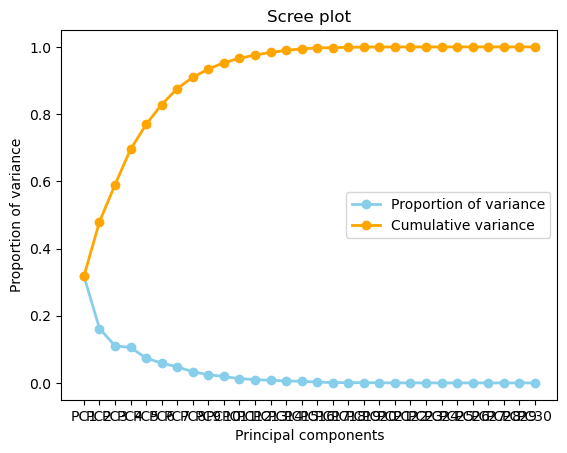

In [198]:
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [199]:
display(prop_var)

[0.31777908099032376,
 0.16195497698915776,
 0.11028009209136558,
 0.10556777732615273,
 0.07384513153380155,
 0.059139052893256897,
 0.047613215487827855,
 0.03334950304432311,
 0.024445759050416987,
 0.019295882365033257,
 0.012510996273245024,
 0.010089017353426237,
 0.007716022716538189,
 0.005885252449896994,
 0.00500682764597543,
 0.002424088758979827,
 0.001094765374392066,
 0.0007292295972315773,
 0.0006889339433873709,
 0.00032971245614078396,
 0.00012572469421085768,
 8.880703444867432e-05,
 3.7875469742608397e-05,
 1.7480981930082323e-06,
 2.2830368208557456e-07,
 2.9805884976451104e-07,
 -5.0371934221210946e-17,
 9.558365548955665e-18,
 -3.761251359457203e-18,
 2.9516370091650485e-20]

In [200]:
u, s, vh = np.linalg.svd(x, full_matrices=True)
x = pd.DataFrame(x)
x.columns = columns
x

,10,2002,blog,blogs,blogspot,business,categories,click,divx,email,...,people,radio,rest,salon,technology,users,web,weblog,weblogs,world
0,-0.044767,0.041182,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,-0.013012,-0.010349,-0.047238,...,-0.030731,-0.00587,-0.106977,-0.005908,-0.010493,0.016913,-0.01376,-0.005814,-0.005814,-0.018845
1,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,-0.013012,-0.010349,-0.047238,...,-0.030731,-0.00587,-0.106977,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
2,-0.044767,0.041182,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,0.010797,-0.010349,0.077762,...,-0.030731,-0.00587,-0.106977,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
3,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,0.010797,-0.010349,0.077762,...,0.040698,-0.00587,-0.106977,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
4,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,-0.013012,-0.010349,-0.047238,...,-0.030731,-0.00587,-0.106977,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,0.034607,-0.010349,0.077762,...,0.040698,-0.00587,0.493023,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
168,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,-0.013012,-0.010349,-0.047238,...,-0.030731,-0.00587,0.493023,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
169,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,0.010797,-0.010349,-0.047238,...,0.112126,-0.00587,0.693023,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845
170,-0.044767,-0.042151,-0.005827,-0.005882,-0.005814,-0.029964,-0.005814,0.010797,-0.010349,-0.047238,...,-0.030731,-0.00587,0.493023,-0.005908,-0.010493,-0.013390,-0.01376,-0.005814,-0.005814,-0.018845


In [201]:
nfeatures = len(x.columns);
nfeatures

30

In [202]:
Vsquare = [[0 for x in range(0,nfeatures)] for y in range(0,nfeatures)] 

for i in range(0,nfeatures):
    for j in range(0,nfeatures):
        Vsquare[i][j] = vh[i][j]**2
        if vh[i][j]<0:

            Vsquare[i][j] = Vsquare[i][j]*-1; 
        else:
            Vsquare[i][j] = Vsquare[i][j]*1; 

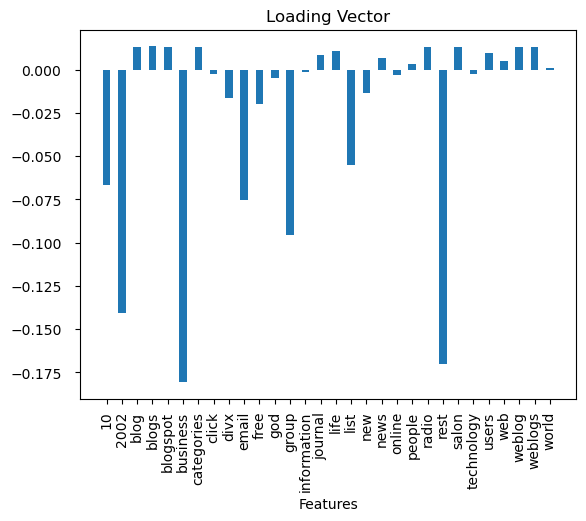

In [223]:
from matplotlib.pyplot import bar, grid, title, xlabel, ylabel

# bar(columns, Vsquare[:][38], 0.5); # CHANGED FROM 1.5 TO 1.0
# grid; 
# xlabel('Feature index')
# ylabel('Importance of feature')
# title("Loading Vector")

y_pos = np.arange(len(columns))
fig, ax = plt.subplots()

ax.bar(columns, Vsquare[:][2], 0.5, linewidth = 1000)
ax.set_xticks(columns)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.set_xticklabels(columns, rotation=90)
ax.set_xlabel('Features')
ax.set_title('Loading Vector')

plt.show() 

## Split the Data

In [204]:
# Split into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape

(137, 30)

## Neural Network

In [205]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

train_shape = x_train.shape
b = train_shape[1]
input_shape = (b,)

print(input_shape)

(30,)


#### Sequential Model

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# https://keras.io/api/models/sequential/

# Activation function options:
# - relu - commonly used for Sequential models
# - sigmoid - good for last layer of binary classification
# - elu - 

model = Sequential()
model.add(Dense(8, input_shape = input_shape, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid')) # Always use a sigmoid function for final layer when performing binary classification.

#### Callbacks

In [207]:
callback1 = keras.callbacks.EarlyStopping(monitor='loss', verbose = 1, min_delta = 0.001,
                                          mode="min", patience=5, restore_best_weights=True) # Works well for loss

callback2 = keras.callbacks.EarlyStopping(
    monitor='precision', verbose = 1, baseline = 0.90,
    min_delta = 0.001, mode="auto", patience=3, restore_best_weights=True) # Works well

In [208]:
model.summary() #This tells us what was in this network
epochs = 500 #Set up the epoch number

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 248       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [209]:
# https://keras.io/api/metrics/classification_metrics/#precision-class
# Optimizer options:
# - sgd (stochastic gradient descent)
# - adam
# - rmsprop
# - adagrad
# - adadelta

# https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses 
# Loss parameter options: 
# - binary_crossentropy https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# - mse 
# - mae
# - hinge
# - huber

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# metrics can be a list, like this: metrics=["mae", "acc"]
# Metrics parameter options:
# - precision https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# - accuracy
# - recall

# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# https://keras.io/api/metrics/classification_metrics/#precision-class

### Hyperparameter Search - Optimize for Precision

In [210]:
# This function will perform a hyperparameter search and print the results to a file
# This takes a while to close the file and flush the buffer!

def hyperparameterSearchWithDoc():
    file = open('output.txt', 'a')
    sys.stdout = file

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])

            score = model.evaluate(x_test, y_test, verbose=0)
            print("Test loss:", score[0])
            print("Test precision:", score[1])
            print("Test False Negatives:", score[2])
            print("Test True Negatives:", score[3])
            print("Test False Positives:", score[4])
            print("Test True Positives:", score[5])

            file.flush()
            os.fsync(file.fileno())
            file.close()

In [211]:
# This version of the function does not write to a file, 
# but it does output the best combination of optimizers and loss functions.
import os

def hyperparameterSearch():
    
    bestPrecision = 0
    bestOpt = ''
    bestLoss = ''
    bestScore = []

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])
            
            score = model.evaluate(x_test, y_test, verbose=0)
            y_pred = (model.predict(x_test) > 0.5).astype("int32")

            if score[1] > bestPrecision:
                bestOpt = optArray[j]
                bestLoss = lossArray[k]
                bestPrecision = score[1]
                bestScore = score
                y_pred = (model.predict(x_test) > 0.5).astype("int32")
                titleNum = "{:.5f}".format(bestPrecision)
                
                model_json = model.to_json() # Convert the model to a json format
                with open("model" + str(bestLoss) + str(bestOpt)+ titleNum + ".json", "w") as json_file: 
                    json_file.write(model_json) # Save the model
                model.save_weights("model" + str(bestLoss) + str(bestOpt) + titleNum + ".h5") # Save the weights
                print("Saved model to disk")
    
    return bestOpt, bestLoss, bestPrecision, bestScore, y_pred

In [212]:
bestOpt, bestLoss, bestPrecision, bestScore, bestPred = hyperparameterSearch()

sgd binary_crossentropy
Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 0.6943 - precision_75: 0.5067 - false_negatives_75: 30.0000 - true_negatives_75: 32.0000 - false_positives_75: 37.0000 - true_positives_75: 38.0000
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - precision_75: 0.5000 - false_negatives_75: 23.0000 - true_negatives_75: 24.0000 - false_positives_75: 45.0000 - true_positives_75: 45.0000
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - precision_75: 0.5039 - false_negatives_75: 4.0000 - true_negatives_75: 6.0000 - false_positives_75: 63.0000 - true_positives_75: 64.0000
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - precision_75: 0.5078 - false_negatives_75: 3.0000 - true_negatives_75: 6.0000 - false_positives_75: 63.0000 - true_positives_75: 65.0000
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - precision_75: 0.5078 - f

In [213]:
display(bestOpt, bestLoss, bestPrecision)

'adam'

'binary_crossentropy'

0.9375

In [214]:
print("Test loss:", bestScore[0])
print("Test precision:", bestScore[1])
print("Test False Negatives:", bestScore[2])
print("Test True Negatives:", bestScore[3])
print("Test False Positives:", bestScore[4])
print("Test True Positives:", bestScore[5])

Test loss: 0.30504751205444336
Test precision: 0.9375
Test False Negatives: 3.0
Test True Negatives: 16.0
Test False Positives: 1.0
Test True Positives: 15.0


## Confusion Matrix Function

In [215]:
# https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusionMatrixGraphing(prediction, title):
    cf_matrix = confusion_matrix(y_test, prediction)

    ax= plt.subplot()
    #annot=True to annotate cells
    sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

## Decision Tree

In [216]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [217]:
y_predictionTree = clf.predict(x_test)

In [218]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics


print("Accuracy:", metrics.accuracy_score(y_test, y_predictionTree))
print("Precision:", metrics.precision_score(y_test, y_predictionTree))

Accuracy: 0.9142857142857143
Precision: 0.9411764705882353


[Text(0.8846153846153846, 0.9761904761904762, 'x[1] <= -0.0\ngini = 0.5\nsamples = 137\nvalue = [69, 68]'),
 Text(0.8461538461538461, 0.9285714285714286, 'x[16] <= 0.015\ngini = 0.444\nsamples = 102\nvalue = [34, 68]'),
 Text(0.7692307692307693, 0.8809523809523809, 'x[22] <= -0.007\ngini = 0.347\nsamples = 85\nvalue = [19, 66]'),
 Text(0.7307692307692307, 0.8333333333333334, 'x[24] <= 0.002\ngini = 0.441\nsamples = 58\nvalue = [19, 39]'),
 Text(0.6923076923076923, 0.7857142857142857, 'x[13] <= 0.377\ngini = 0.423\nsamples = 56\nvalue = [17, 39]'),
 Text(0.6538461538461539, 0.7380952380952381, 'x[29] <= -0.002\ngini = 0.413\nsamples = 55\nvalue = [16, 39]'),
 Text(0.6153846153846154, 0.6904761904761905, 'x[18] <= -0.003\ngini = 0.44\nsamples = 49\nvalue = [16, 33]'),
 Text(0.5769230769230769, 0.6428571428571429, 'x[5] <= 0.085\ngini = 0.43\nsamples = 48\nvalue = [15, 33]'),
 Text(0.5384615384615384, 0.5952380952380952, 'x[26] <= 0.086\ngini = 0.418\nsamples = 47\nvalue = [14, 33]'),
 Te

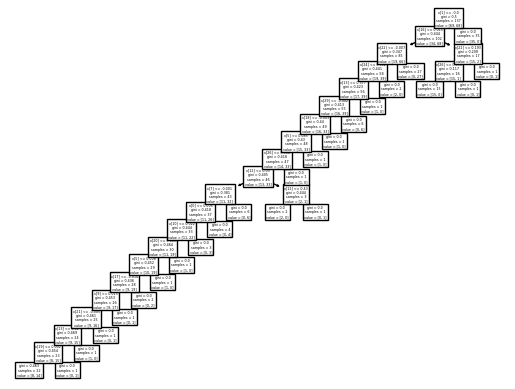

In [219]:
tree.plot_tree(clf)

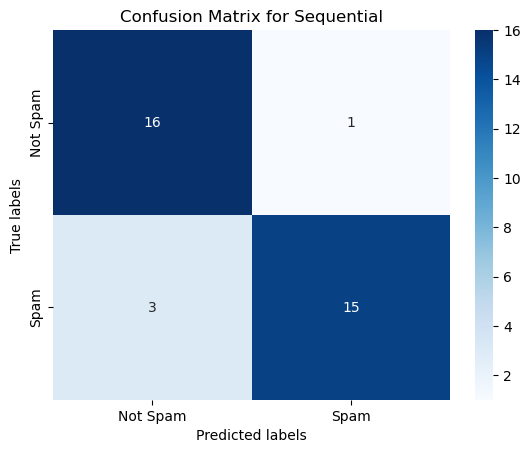

In [220]:
confusionMatrixGraphing(bestPred, 'Confusion Matrix for Sequential')

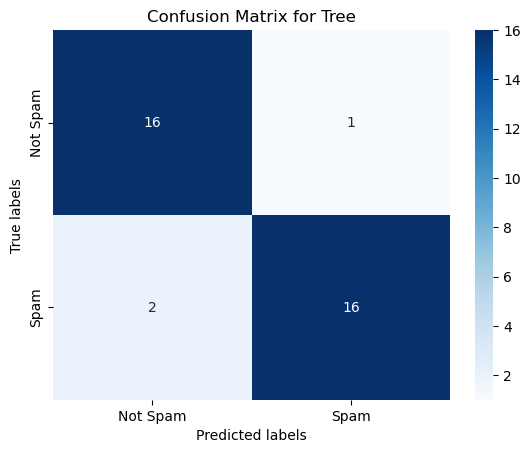

In [221]:
confusionMatrixGraphing(y_predictionTree, 'Confusion Matrix for Tree')